In [1]:
# import dependencies
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
# Load in data
df = pd.read_csv('../Resources/rotten_tomatoes_movies.csv')

# count unique values in each column
# df.nunique()

# check column datatypes
# df.dtypes

# df.count()

In [3]:
columns_excluded = [
            'rotten_tomatoes_link',              
            'movie_title',                       
            'movie_info',                        
            'critics_consensus',                 
            'poster_image_url',
            'directors',
            'writers',                           
            'cast',                              
            'in_theaters_date',                  
            'on_streaming_date',
              ]

# excluding irrelevant column from analysis
df.drop(columns = columns_excluded, axis=1, inplace=True)
df.dropna(inplace=True)
        
# Drop the label to create the X data
X = df.drop('tomatometer_status', axis=1)

In [4]:
# df.nunique()

In [5]:
# df.count()

In [6]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count',
       'audience_rating', 'audience_count', 'audience_top_critics_count',
       'audience_fresh_critics_count', 'audience_rotten_critics_count',
       'rating_G', 'rating_NC17',
       ...
       'studio_name_eOne', 'studio_name_eOne Entertainment',
       'studio_name_eOne Entertainment Distribution', 'studio_name_eRealBiz',
       'studio_name_iHQ', 'studio_name_levelFILM',
       'studio_name_nWave Pictures', 'studio_name_s',
       'audience_status_Spilled', 'audience_status_Upright'],
      dtype='object', length=3887)


,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,rating_G,rating_NC17,...,studio_name_eOne,studio_name_eOne Entertainment,studio_name_eOne Entertainment Distribution,studio_name_eRealBiz,studio_name_iHQ,studio_name_levelFILM,studio_name_nWave Pictures,studio_name_s,audience_status_Spilled,audience_status_Upright
0,83.0,49,144,53.0,254287.0,38,71,73,0,0,...,0,0,0,0,0,0,0,0,1,0
1,90.0,86,140,64.0,11567.0,43,121,19,0,0,...,0,0,0,0,0,0,0,0,0,1
2,118.0,68,22,53.0,14670.0,2,15,7,0,0,...,0,0,0,0,0,0,0,0,1,0
3,95.0,100,51,97.0,105000.0,6,51,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,127.0,89,27,74.0,68860.0,5,24,3,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,104.0,56,9,74.0,1192.0,2,5,4,0,0,...,0,0,0,0,0,0,0,0,0,1
16634,108.0,97,279,92.0,100946.0,47,272,7,0,0,...,0,0,0,0,0,0,0,0,0,1
16635,142.0,78,9,87.0,7126.0,0,7,2,0,0,...,0,0,0,0,0,0,0,0,0,1
16636,139.0,95,21,91.0,30170.0,5,20,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Converting output labels to 0, 1 and 2
y_label = LabelEncoder().fit_transform(df['tomatometer_status'])
y_label

array([2, 0, 1, ..., 1, 1, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)

In [9]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9901614530776993


In [10]:
feature_importances = clf.feature_importances_

In [11]:
# features = clf.feature_importances_
# print(features)
# plt.bar(x = range(len(features)), height=features)
# plt.show()

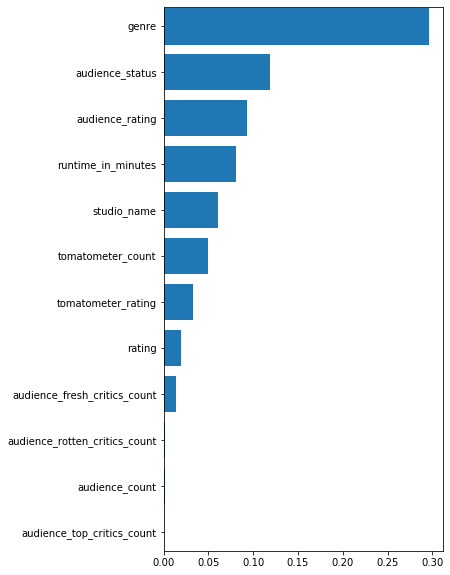

In [12]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True, ..., False,  True,  True])

In [15]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_dummies), y_label, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\erico\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [16]:
clf = LogisticRegression(max_iter=10000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9858728557013118
Testing Score: 0.9306256306760847


*The logistic regression model that incorporates all features has a testing score of 92%*

In [17]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9738479650184998
Testing Score: 0.9634207870837538


*Once we incorporate the selected features, we get an improved accuracy of 96% indicating that the model has reduced the amount of noisy parameters which were previously confusing it*